# Write a function for a single frame:
* Go around the singularity in a circle of a given radius and plot the value of the phase

* Also make a plot of the circle, like on the right (actually, it would be better to indicate the individual pixels instead of drawing an ideal circle)

* Background: in some systems, the phase jump can be less than 2pi


In [341]:
import numpy as np
import xarray as xr
import holoviews as hv
hv.notebook_extension()
import matplotlib.pyplot as plt

In [342]:
ds = xr.open_dataset("fuw hackathon 2018/data/2017-11-03 mag sequence phase.nc")
hvds = hv.Dataset(ds)
hvds()

:Dataset   [y,x,field]   (Absolute value,Phase)

In [343]:
phases = hvds.to(hv.Image, kdims=["x", "y"], vdims=["Phase"])
fields = phases.dimension_values("field", expanded=False)

# setting flat=False will preserve the matrix shape
data = phases[fields[1]].dimension_values("Phase", flat=False)

In [351]:
def circle_coordinates(coordinates, radius,density=20):
    latitude = coordinates[0] # latitude of circle center, decimal degrees
    longitude = coordinates[1]
    x,y=[],[]
    density = int(np.ceil(density*radius)) + 1
    for k in range(density+1):
        a = np.pi*2*k/density
        dx = radius * np.cos(a) + latitude
        dy = radius * np.sin(a) + longitude
        x.append(dx)
        y.append(dy)
    return x,y


In [376]:
def azimuth(x,y):
    r=np.zeros(len(x))
    for i in range(len(x)):
        if i == len(x)-1:
            X1, X2 = x[i], x[0]
            Y1, Y2 = y[i], y[0]
        else:
            X1, X2 = x[i], x[i+1]
            Y1, Y2 = y[i], y[i+1]
        r[i]=np.arctan2(X2-X1,Y2-Y1)/np.pi
    return r
    

In [391]:
def single_frame(data, vortex = [2,2], radii = [1],savefig=False):
    '''
    PHASE VS AZIMUTH

    Parameters:
    --------------------
    data: phase data
    vortex: x and y coordinates
    radii: radius input of every circle you want
    '''
    markers_list = ["<",">","1","2","3","4","8"]
    phases,azimuths = {}, {}

    plt.figure(figsize=(12,5))

    ##FIRST PLOT
    plt.subplot(121)
    im=plt.imshow(data, extent=(-4,4,-4,4))

    for i in range(len(radii)):
        x,y = circle_coordinates(vortex,radii[i]/2,
                                density=30)
        plt.plot(x,y,"--o")

        phase = [data[int(y[j]*23),
                      int(x[j]*23)] for j in range(len(x))]
        az = azimuth(x,y)
        phases.update({str(i):phase})
        azimuths.update({str(i):az})
        for f, txt in enumerate(list(range(len(x)))):
            plt.annotate(txt, (x[f],y[f]))

    plt.colorbar(im)#,label="Phase ($\pi$)")
    s=0.1
    plt.axis([vortex[0] - max(radii)/2-s,
              vortex[0] + max(radii)/2+s,
              vortex[1] - max(radii)/2-s,
              vortex[1] + max(radii)/2+s])
    plt.xlabel("x ($\mu$m)",fontsize=25)
    plt.ylabel("y ($\mu$m)",fontsize=25)

    ##SECOND PLOT
    plt.subplot(122)

    for i in range(len(phases)):
        plt.plot(azimuths[str(i)],
                 phases[str(i)],
                 label = str(radii[i]) + " $\mu$m",
                 marker=markers_list[i])
        for f, txt in enumerate(list(range(len(x)))):
            plt.annotate(txt, (x[f],y[f]))
    plt.legend()
    plt.ylabel("Phase ($\pi$)",fontsize=25)
    plt.xlabel("Azimuthal angle ($\pi$)",fontsize=25)
    if savefig == True:
        import sys
        import os
        file_name =  os.path.basename(sys.argv[0]).split(".")[0]
        plt.savefig(file_name+".png")
    plt.show()


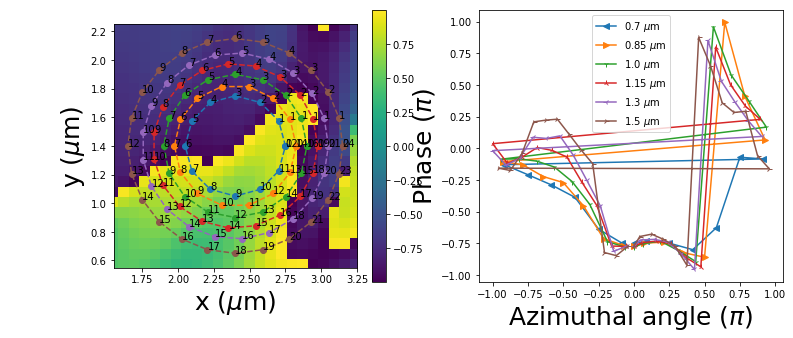

In [392]:
r = np.array([0.70,0.85,1.00,1.15,1.30,1.5])
single_frame(data = data, vortex = [2.4,1.4], radii=r,savefig=False)

In [385]:
for i, txt in enumerate(list(range(len(x)))):
            ax.annotate(txt, (x[i],y[i]))

In [398]:
a = np.arange(1,10).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [400]:
a = np.hstack((a[:len(a)//2],a[len(a)//2:]))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [397]:
a

array([[ 5,  7,  9],
       [ 8, 10, 12]])